# Introduction to:


# 1) Data Visualization


# 2) GIS in Python with GeoPandas and Folium

## Introduction to Data Visualization


**Edgar Martín Hernández**

**Department of Chemical Engineering**

**University of Salamanca**


<img src="Images_plotting/plot_guide.jpeg"  width="700" align="center"/>

There are multiple libraries for data visualization in Python:

**General purpose**: Matplotlib 
**Integrated with pandas**: Seaborn, ggplot 
**Interactive**: bokeh, Plotly
**Mapping**: Folium



### Matplotlib

In [4]:
import numpy as np
import matplotlib.pyplot as plt
# %matplotlib inline
%matplotlib notebook 
#hay que correrlo dos veces

<IPython.core.display.Javascript object>


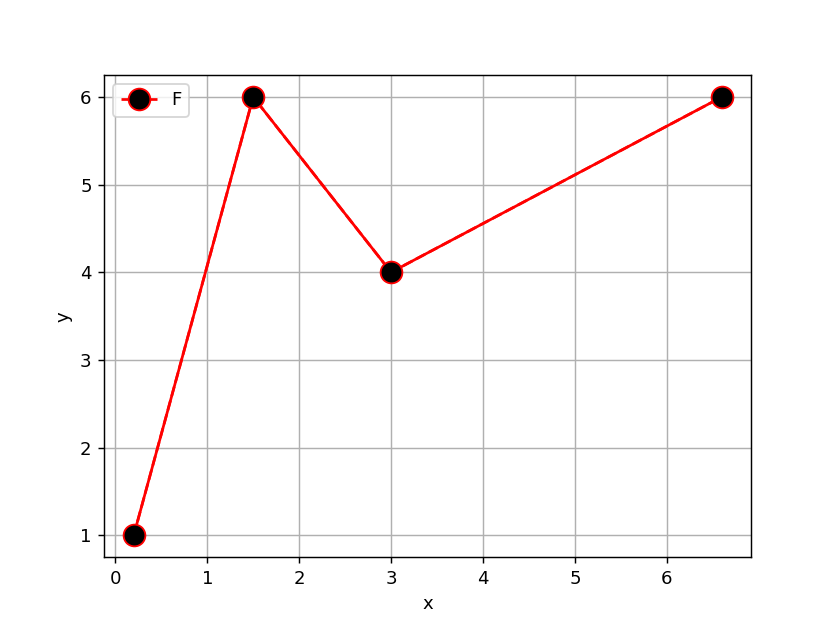

In [5]:
a=[0.2, 1.5 ,3, 6.6]
b=[1,6,4, 6]

plt.plot(a,b, 'ro-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend('F')
plt.show()

plt.savefig('example.png')
plt.savefig('example.pdf')

In [6]:
plt.plot(a, b, color='r', linestyle='dashed', marker='o',
     markerfacecolor='k', markersize=12, label='F')
plt.legend()
plt.grid(True)

In [7]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt

#Kinetics coeficients
k_1=0.002992
k_2=0.01168

#Kinetic equations definition
def kinetics (C,t):    
    #C[0]: A concentration
    #C[1]: B concentration
    #dCdt[0]: Time variation of A concentration
    #dCdt[1]: Time variation of B concentration
    #dCdt[2]: Time variation of C concentration
    #dCdt[3]: Time variation of D concentration    
    #An empty list is created to save the dCdt results 
    dCdt=np.zeros(4)    
    dCdt[0] = -k_1*C[0]
    dCdt[1] = -k_2*C[1]+k_1*C[0]
    dCdt[2] = k_1*C[0]
    dCdt[3] = k_2*C[1]    
    return dCdt

#Initial conditions
C_ini=[1, 0, 0, 0]
#Time interval to evaluate the reactions
t=np.linspace(0,3600,500)
#ODEs resolution
res_C=integrate.odeint(kinetics,C_ini,t)
res_C

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.78645731e-01, 2.04761961e-02, 2.13542694e-02, 8.78073348e-04],
       [9.57747465e-01, 3.88604349e-02, 4.22525346e-02, 3.39209966e-03],
       ...,
       [2.19200414e-05, 7.54633202e-06, 9.99978080e-01, 9.99970534e-01],
       [2.14518367e-05, 7.38517493e-06, 9.99978548e-01, 9.99971163e-01],
       [2.09936246e-05, 7.22748354e-06, 9.99979006e-01, 9.99971779e-01]])

<IPython.core.display.Javascript object>


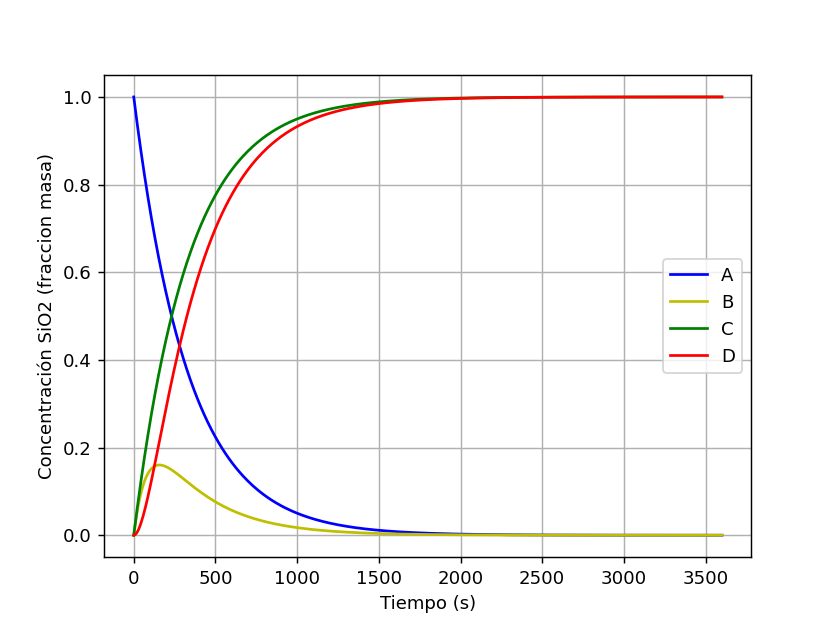

In [8]:
#Plotting
fig,axes=plt.subplots()
axes.plot(t,res_C[:,0],'b')
axes.plot(t,res_C[:,1],'y')
axes.plot(t,res_C[:,2],'g')
axes.plot(t,res_C[:,3],'r')
axes.set_xlabel('Tiempo (s)')
axes.set_ylabel('Concentración SiO2 (fraccion masa)')
axes.grid('on')
axes.legend('ABCD')
plt.show()
# fig.savefig('reaction.png')

<IPython.core.display.Javascript object>


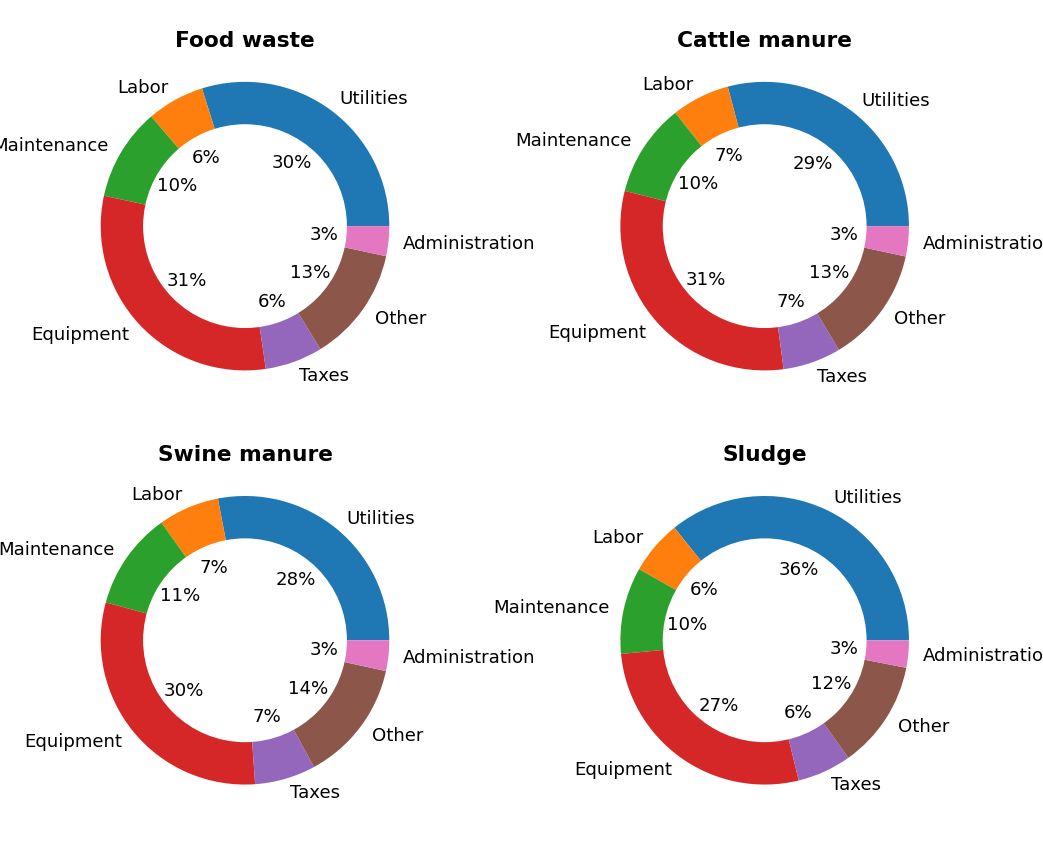

In [11]:
# create data
names = ['Utilities', 'Labor', 'Maintenance', 'Equipment', 'Taxes', 'Other', 'Administration']  
values_food = [0.3,
0.064915066,
0.10416768,
0.308789867,
0.064915066,
0.129830132,
0.033630891,]

values_cattle = [0.291177942,
0.065091156,
0.104450247,
0.310253756,
0.065091156,
0.130182312,
0.033753431]

values_pig = [0.280140906,
0.068180983,
0.109408421,
0.303447736,
0.068180983,
0.136361966,
0.034279004]

values_sludge = [0.357550957,
0.060490311,
0.09706738,
0.272827607,
0.060490311,
0.120980622,
0.030592812,
]

def func(pct, values_food):
    absolute = int(pct/100.*np.sum(values_food))
    return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
# Create a circle for the center of the plot
my_circle1=plt.Circle( (0,0), 0.7, color='white')
my_circle2=plt.Circle( (0,0), 0.7, color='white')
my_circle3=plt.Circle( (0,0), 0.7, color='white')
my_circle4=plt.Circle( (0,0), 0.7, color='white')

# Custom colors --> colors will cycle
plt.figure(3, figsize=(8,6.5))
plt.subplot(221)
plt.pie(values_food, labels=names, autopct='%.0f%%', pctdistance=0.55)
p=plt.gcf()
p.gca().add_artist(my_circle1)
plt.title('Food waste', fontweight="bold", y=0.97)

plt.subplot(222)
plt.pie(values_cattle, labels=names, autopct='%.0f%%', pctdistance=0.55)
p=plt.gcf()
p.gca().add_artist(my_circle2)
plt.title('Cattle manure', fontweight="bold", y=0.97)

plt.subplot(223)
plt.pie(values_pig, labels=names, autopct='%.0f%%', pctdistance=0.55)
p=plt.gcf()
p.gca().add_artist(my_circle3)
plt.title('Swine manure', fontweight="bold", y=0.97)

plt.subplot(224)
plt.pie(values_sludge, labels=names, autopct='%.0f%%', pctdistance=0.55)
p=plt.gcf()
p.gca().add_artist(my_circle4)
plt.title('Sludge', fontweight="bold", y=0.97)

#plt.legend(names, loc="lower center", bbox_to_anchor=(-1.1, -0.2, 2, 1), ncol=4, mode='expand')
plt.tight_layout()
plt.savefig("Production_cost.pdf", bbox_inches='tight')
plt.savefig("Production_cost.png", bbox_inches='tight')

plt.show()


### Seaborn

In [12]:
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cm
import matplotlib.pyplot as plt
# from matplotlib.mlab import griddata
import numpy as np
import scipy.interpolate
from scipy.optimize import curve_fit
# from matplotlib.ticker import LinearLocator, FormatStrFormatter
# import csv
import pandas as pd
import seaborn as sns
#sns.set(style=None)

#output_matrix_Mg1 = np.loadtxt(open("Output_Mg1.csv", "r"), delimiter=",")
#output_matrix_Mg2 = np.loadtxt(open("Output_Mg2.csv", "r"), delimiter=",")
#output_matrix_Mg3 = np.loadtxt(open("Output_Mg3.csv", "r"), delimiter=",")
#output_matrix_Mg4 = np.loadtxt(open("Output_Mg4.csv", "r"), delimiter=",")
#output_matrix_Mg5 = np.loadtxt(open("Output_Mg5.csv", "r"), delimiter=",")

output_data_Mg1 = pd.read_csv('Results_struvite/Output_Mg1.csv', sep=",", header=None, names=["Mg", "MC", "StrYield", "Str", "HAP", "CaCO3", "CaOH2", "MgOH2", "CAP", "DCP", "KStr", "count"])
output_data_Mg2 = pd.read_csv('Results_struvite/Output_Mg2.csv', sep=",", header=None, names=["Mg", "MC", "StrYield", "Str", "HAP", "CaCO3", "CaOH2", "MgOH2", "CAP", "DCP", "KStr", "count"])
output_data_Mg3 = pd.read_csv('Results_struvite/Output_Mg3.csv', sep=",", header=None, names=["Mg", "MC", "StrYield", "Str", "HAP", "CaCO3", "CaOH2", "MgOH2", "CAP", "DCP", "KStr", "count"])
output_data_Mg4 = pd.read_csv('Results_struvite/Output_Mg4.csv', sep=",", header=None, names=["Mg", "MC", "StrYield", "Str", "HAP", "CaCO3", "CaOH2", "MgOH2", "CAP", "DCP", "KStr", "count"])
output_data_Mg5 = pd.read_csv('Results_struvite/Output_Mg5.csv', sep=",", header=None, names=["Mg", "MC", "StrYield", "Str", "HAP", "CaCO3", "CaOH2", "MgOH2", "CAP", "DCP", "KStr", "count"])

bigdata = pd.concat([output_data_Mg1, output_data_Mg2, output_data_Mg3, output_data_Mg4, output_data_Mg5], ignore_index=True)


<IPython.core.display.Javascript object>


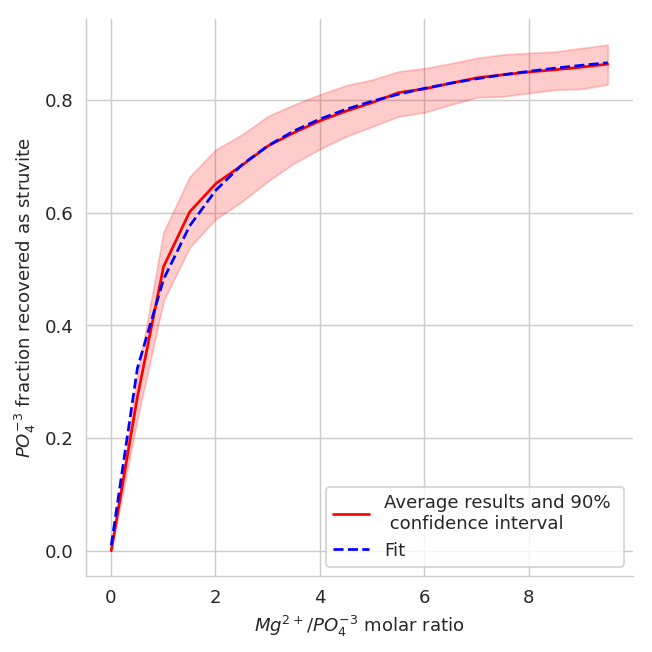

/home/emh/Documents/Paper Gerardo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 90)` for the same effect.

  func(*plot_args, **plot_kwargs)


In [13]:
#Mg_array = bigdata["Mg"].tolist()
Mg_array = np.array(bigdata["Mg"])


#STRUVITE YIELD
#StrYield_array = bigdata["StrYield"].tolist()
StrYield_array=np.array(bigdata["StrYield"])

def func_StrYield(xdata, a, b):
    return (a*xdata)/(b+xdata) #Monod function

parameters_StrYield, cov_StrYield = curve_fit(func_StrYield, Mg_array, StrYield_array)


with sns.plotting_context("paper") and sns.axes_style("whitegrid"):#("darkgrid"):
    sns.relplot(x="Mg", y="StrYield", kind="line", ci=90, color="red", data=bigdata, label='Average results and 90% \n confidence interval')
    plt.plot(Mg_array[0:200], func_StrYield(Mg_array, *parameters_StrYield)[0:200], 'b--',label='Fit')#: a=%5.3f, b=%5.3f' % tuple(parameters_StrYield))
    plt.legend(loc='lower right')
    plt.xlabel("$ {Mg}^{2+}/{PO_{4}^{-3}} $ molar ratio")
    plt.ylabel('$PO_{4}^{-3} $ fraction recovered as struvite')
    plt.savefig("plotStrYield_Mg.pdf")

#### Heatmaps plotting

In [14]:
Scenario = "AllScenarios"

files_df_AllScenarios = pd.read_csv('Scenarios/DataAnalysis/AllScenarios/DataAnalysis_'+Scenario+'Extended.csv', sep=",", header=0,
                                   index_col='Scenario')


files_df_AllScenariosPlot = pd.DataFrame()
files_df_AllScenariosPlot['State'] = files_df_AllScenarios['State'].astype(str)
files_df_AllScenariosPlot['Electricity price'] = files_df_AllScenarios['REC'].astype(int)
files_df_AllScenariosPlot['PCredits'] = files_df_AllScenarios['PCredits'].astype(int)
files_df_AllScenariosPlot['% Profitable (total)'] = files_df_AllScenarios['% Profitable (total)'].astype(int)
files_df_AllScenariosPlot['% Recommended (total)'] = files_df_AllScenarios['% Recommended (total)'].astype(int)


<IPython.core.display.Javascript object>


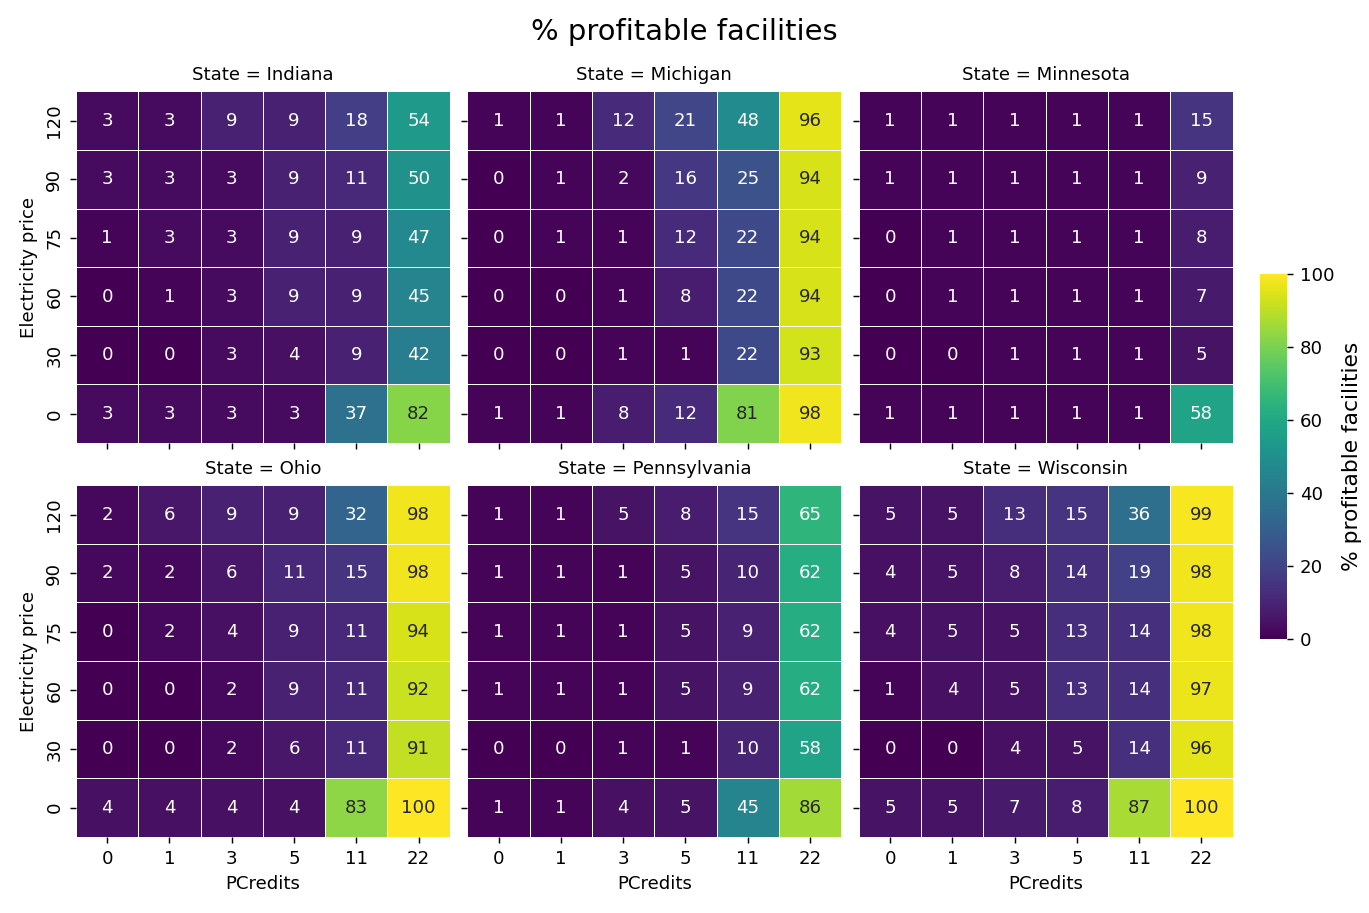

In [15]:
g = sns.FacetGrid(files_df_AllScenariosPlot, col="State", col_wrap=3, height=3.5, aspect=1,
                 )
g

In [16]:
#Function to generate each heatmap

def heatmap_func(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

In [17]:
cbar_ax = g.fig.add_axes([.92, .3, .02, .4])  # <-- Create a colorbar axes Dimensions and position

#  FacetGrid.map_dataframe(self, func, *args, **kwargs)
#  Like .map but passes args as strings and inserts data in kwargs.
#  This method is suitable for plotting with functions that accept a long-form DataFrame as 
#  data keyword argument and access the data in that DataFrame using string variable names.

g.map_dataframe(heatmap_func, 'PCredits', 'Electricity price', "% Profitable (total)", square = False,  
                cmap='viridis', cbar_ax=cbar_ax, vmin=0, vmax=100, annot=True,  annot_kws={"size": 10}, 
                linewidth=.5, fmt=".0f", cbar_kws={'label': '% profitable facilities'}) #annot_kws={"size": 7}

#comment colormaps

/home/emh/Documents/Paper Gerardo/venv/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


In [18]:
g.fig.subplots_adjust(right=0.9,top=0.9)  # <-- Add space so the colorbar doesn't overlap the plot
g.fig.suptitle("% profitable facilities", fontsize=16)

# Invert y axis
g.fig.axes[0].invert_yaxis()

# Change label font size
g.fig.axes[-1].yaxis.label.set_size(12)

plt.savefig('DataAnalysisProfitable.pdf', bbox_inches='tight') 
plt.show()
#Comentar bbox_inches='tight'

<IPython.core.display.Javascript object>


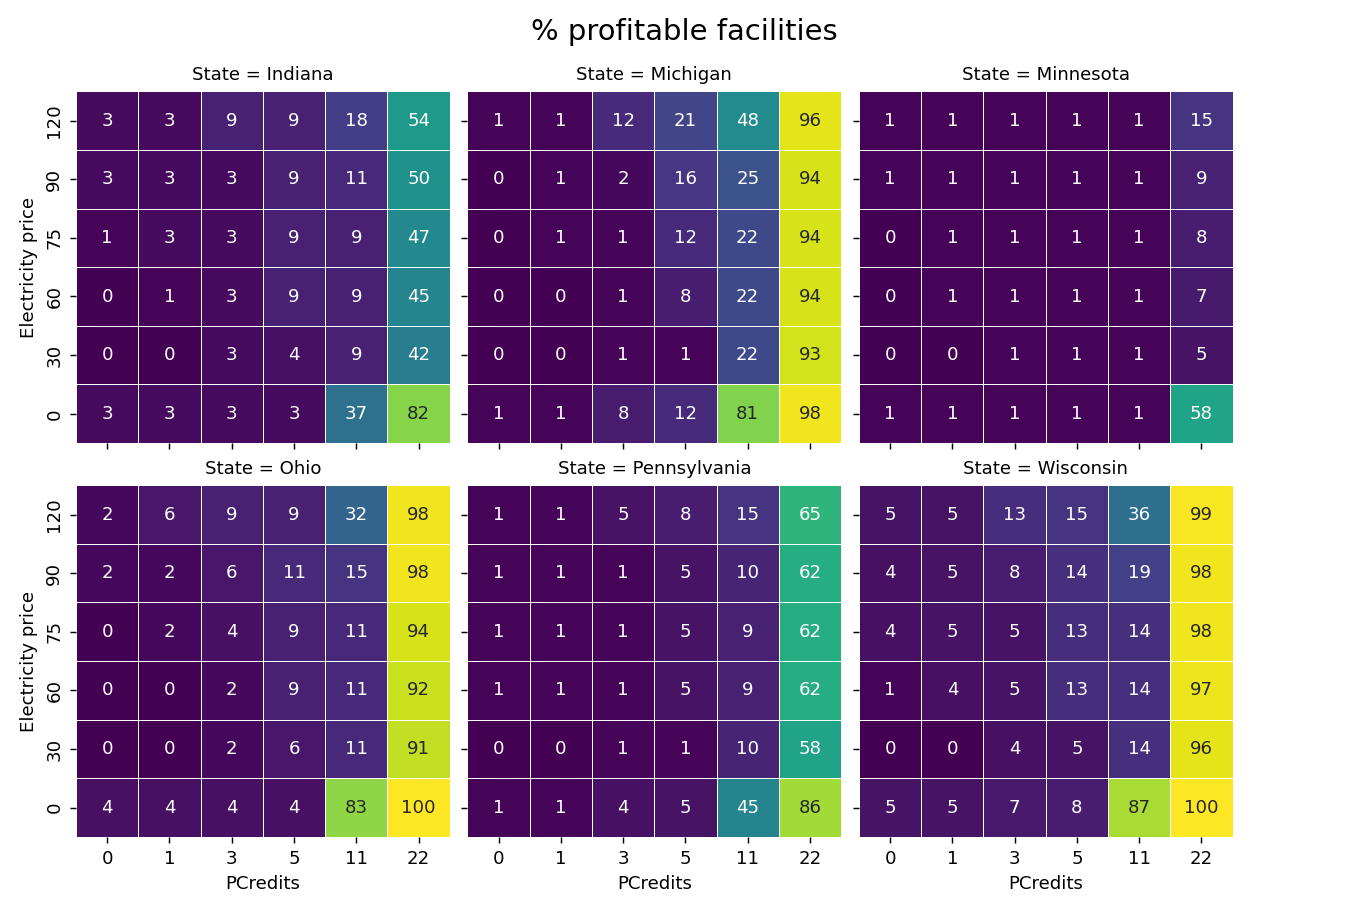

In [19]:
# Code complete:
Scenario = "AllScenarios"

files_df_AllScenarios = pd.read_csv('Scenarios/DataAnalysis/AllScenarios/DataAnalysis_'+Scenario+'Extended.csv', sep=",", header=0,
                                   index_col='Scenario')


files_df_AllScenariosPlot = pd.DataFrame()
files_df_AllScenariosPlot['State'] = files_df_AllScenarios['State'].astype(str)
files_df_AllScenariosPlot['Electricity price'] = files_df_AllScenarios['REC'].astype(int)
files_df_AllScenariosPlot['PCredits'] = files_df_AllScenarios['PCredits'].astype(int)
files_df_AllScenariosPlot['% Profitable (total)'] = files_df_AllScenarios['% Profitable (total)'].astype(int)
files_df_AllScenariosPlot['% Recommended (total)'] = files_df_AllScenarios['% Recommended (total)'].astype(int)


def heatmap_func(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot(index=args[1], columns=args[0], values=args[2])
    sns.heatmap(d, **kwargs)

g = sns.FacetGrid(files_df_AllScenariosPlot, col="State", col_wrap=3, height=3.5, aspect=1,
                 ) #hue="% Profitable (total)"


g.map_dataframe(heatmap_func, 'PCredits', 'Electricity price', "% Profitable (total)", square = False,  cmap='viridis', 
               cbar_ax=cbar_ax, vmin=0, vmax=100, annot=True,  annot_kws={"size": 10}, linewidth=.5,
               fmt=".0f", cbar_kws={'label': '% profitable facilities'}) #annot_kws={"size": 7}

g.fig.subplots_adjust(right=0.9,top=0.9)  # <-- Add space so the colorbar doesn't overlap the plot
g.fig.suptitle("% profitable facilities", fontsize=16)

# Invert y axis
g.fig.axes[0].invert_yaxis()

# Change label font size
g.fig.axes[-1].yaxis.label.set_size(12)

plt.savefig('DataAnalysisProfitable.pdf', bbox_inches='tight') 
#Comentar bbox_inches='tight'

## Introduction to GIS in Python with GeoPandas and Folium

### Import .shp data Provinces

In [20]:
import os
# import conda
import pandas as pd
import numpy as np
import json
from scipy.optimize import curve_fit
from shapely.geometry import MultiPoint, Point
import unidecode
import random


# pd.options.display.max_columns = 250
# pd.options.display.max_rows = 2500


# conda_file_dir = conda.__file__
# conda_dir = conda_file_dir.split('lib')[0]
# proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
# os.environ["PROJ_LIB"] = proj_lib

import matplotlib.pyplot as plt
import matplotlib.cm
import matplotlib.colors as colors

import geopandas
from geopandas.tools import sjoin
from shapely.geometry import Point
# import geoplot as gplt
# import geoplot.crs as gcrs

import folium

ModuleNotFoundError: No module named 'folium'

In [ ]:
Provinces_shp  = geopandas.GeoDataFrame.from_file('GIS_files/au.prov_cyl_recintos/au.prov_cyl_recintos.shp', encoding='utf-8') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'AVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEON'
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp = Provinces_shp.set_index('PROVINCIA', drop=False)
Provinces_shp

### Add province capital coordinates

In [ ]:
CapitalCoordinates_latitude = dict()
CapitalCoordinates_longitude = dict()

CapitalCoordinates_latitude['AVILA'] = 40.6569173
CapitalCoordinates_latitude['BURGOS'] = 42.3441564
CapitalCoordinates_latitude['LEON'] = 42.6036359
CapitalCoordinates_latitude['PALENCIA'] = 42.0088467
CapitalCoordinates_latitude['SALAMANCA'] = 40.9634696
CapitalCoordinates_latitude['SEGOVIA'] = 40.9412812
CapitalCoordinates_latitude['SORIA'] = 41.7671522
CapitalCoordinates_latitude['VALLADOLID'] = 41.7033604
CapitalCoordinates_latitude['ZAMORA'] = 41.5038406

CapitalCoordinates_longitude['AVILA'] = -4.6997033
CapitalCoordinates_longitude['BURGOS'] = -3.7122026
CapitalCoordinates_longitude['LEON'] = -5.5949009
CapitalCoordinates_longitude['PALENCIA'] = -4.5444634
CapitalCoordinates_longitude['SALAMANCA'] = -5.6867217
CapitalCoordinates_longitude['SEGOVIA'] = -4.1297115
CapitalCoordinates_longitude['SORIA'] = -2.4920886
CapitalCoordinates_longitude['VALLADOLID'] = -4.8788517
CapitalCoordinates_longitude['ZAMORA'] = -5.7620456

Provinces_shp['Cap_lat'] = Provinces_shp.index.map(CapitalCoordinates_latitude)
Provinces_shp['Cap_lon'] = Provinces_shp.index.map(CapitalCoordinates_longitude)

Provinces_shp.to_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesWithCapitals_shp.shp')


Provinces_shp

In [ ]:
# ONLY PROVINCES 

from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

Provinces_shp  = geopandas.GeoDataFrame.from_file('GIS_files/au.prov_cyl_recintos/au.prov_cyl_recintos.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
Provinces_json = Provinces_shp.to_json()

m_CyLProvinces = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 

m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvinces)


folium.LayerControl().add_to(m_CyLProvinces)


# CAPITALS WITH MARKERS
## for row in results_total[results_total['tech_selected'] == 'MULTIFORM'].itertuples():
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.Marker(location=[row.latitude,row.longitude],
#                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                         popup=row.Total_animals,tooltip=row.Total_animals))
# CAFOS WITH DYNAMIC CIRCLES
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.CircleMarker(location=[row.latitude,row.longitude],
#                                              radius=row.Total_animals/100,
# #                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                             popup='{} BOVINO'.format(row.Total_animals),tooltip=row.MUNICIPIO,
#                                             color='#3186cc', fill=True, fill_color='#3186cc'))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvinces)

Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvinces)                                                

# m_HUC2_layer = folium.GeoJson(
#     HUC2_json,
#     name='% P releases avoided scenario 1',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_HUC2)

m_CyLProvinces.save('CentroidsFiles/m_CyLProvinces.html')

In [ ]:
# PROVINCES WITH CAPITALS
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

Provinces_shp  = geopandas.GeoDataFrame.from_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesWithCapitals_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
Provinces_json = Provinces_shp.to_json()

m_CyLProvinces = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvinces) 

m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvinces)
drop=True

folium.LayerControl().add_to(m_CyLProvinces)


# CAPITALS WITH MARKERS
# for row in results_total[results_total['tech_selected'] == 'MULTIFORM'].itertuples():
for row in Provinces_shp.itertuples():
    m_CyLProvinces.add_child(folium.Marker(location=[row.Cap_lat,row.Cap_lon],
                                        icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.PROVINCIA,tooltip=row.PROVINCIA))
# CAFOS WITH DYNAMIC CIRCLES
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.CircleMarker(location=[row.latitude,row.longitude],
#                                              radius=row.Total_animals/100,
# #                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                             popup='{} BOVINO'.format(row.Total_animals),tooltip=row.MUNICIPIO,
#                                             color='#3186cc', fill=True, fill_color='#3186cc'))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvinces)

Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvinces)                                                

# m_HUC2_layer = folium.GeoJson(
#     HUC2_json,
#     name='% P releases avoided scenario 1',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_HUC2)

m_CyLProvinces.save('CentroidsFiles/m_CyLProvincesWithCapitals.html')

### Computing centroids of provinces

In [ ]:
def first_polygon(geo):
    if geo.geom_type == 'Polygon':
        return geo
    elif geo.geom_type == 'MultiPolygon':
        return geo[0]
    
Provinces_shp  = geopandas.GeoDataFrame.from_file('GIS_files/au.prov_cyl_recintos/au.prov_cyl_recintos.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'

ProvincesCentroids_shp = Provinces_shp.copy()# Getting the first polygon
ProvincesCentroids_shp['geometry'] = ProvincesCentroids_shp['geometry'].apply(lambda _geo: first_polygon(_geo))

Provinces_shp['Centroids'] = ProvincesCentroids_shp.centroid

# Getting lists for x and y corrdinates for centroids
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = Provinces_shp['Centroids']
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

Provinces_shp['Centroid_X'] = x
Provinces_shp['Centroid_Y'] = y
Provinces_shp = Provinces_shp.drop(columns=['Centroids'])

Provinces_shp.to_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesCentroids_shp.shp')



# csv file
Provinces_csv = Provinces_shp.copy()
Provinces_csv = Provinces_csv.drop(columns=['geometry'])
Provinces_csv.to_csv('CentroidsFiles/Provinces_csv.csv', index=False)

Provinces_shp

In [ ]:
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

Provinces_shp  = geopandas.GeoDataFrame.from_file('CentroidsFiles/ProvincesCentroids_shp/ProvincesCentroids_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
# Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
# Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
# Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
Provinces_json = Provinces_shp.to_json()

m_CyLProvincesCentroids = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLProvincesCentroids) 

m_CyLProvinces_layer = folium.GeoJson(
    Provinces_json,
    name='Provinces',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['PROVINCIA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLProvincesCentroids)


folium.LayerControl().add_to(m_CyLProvincesCentroids)


# CAFOS WITH MARKERS
# for row in results_total[results_total['tech_selected'] == 'MULTIFORM'].itertuples():
for row in Provinces_shp.itertuples():
    m_CyLProvincesCentroids.add_child(folium.Marker(location=[row.Centroid_Y,row.Centroid_X],
                                        icon=folium.Icon(color='red', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.PROVINCIA,tooltip=row.PROVINCIA))
# CAFOS WITH DYNAMIC CIRCLES
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.CircleMarker(location=[row.latitude,row.longitude],
#                                              radius=row.Total_animals/100,
# #                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                             popup='{} BOVINO'.format(row.Total_animals),tooltip=row.MUNICIPIO,
#                                             color='#3186cc', fill=True, fill_color='#3186cc'))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLProvincesCentroids)

Provincessearch = Search(
    layer=m_CyLProvinces_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='PROVINCIA',
    weight=3
).add_to(m_CyLProvincesCentroids)                                                

# m_HUC2_layer = folium.GeoJson(
#     HUC2_json,
#     name='% P releases avoided scenario 1',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_HUC2)

m_CyLProvincesCentroids.save('CentroidsFiles/m_CyLProvincesCentroids.html')

### Import .shp data Comarcas agrarias and computing centroids of provinces

In [ ]:
ComarcasAgrarias_shp  = geopandas.GeoDataFrame.from_file('GIS_files/Comarcalizacion_Comarcas_Agrarias_Population/Comarcalizacion_Comarcas_Agrarias_Population.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}

# Computing centroids of provinces
def first_polygon(geo):
    if geo.geom_type == 'Polygon':
        return geo
    elif geo.geom_type == 'MultiPolygon':
        return geo[0]
    
ComarcasAgrarias_shp = ComarcasAgrarias_shp.to_crs("EPSG:4326")

ComarcasAgrarias_shpCentroids_shp = ComarcasAgrarias_shp.copy()# Getting the first polygon
ComarcasAgrarias_shpCentroids_shp['geometry'] = ComarcasAgrarias_shpCentroids_shp['geometry'].apply(lambda _geo: first_polygon(_geo))

ComarcasAgrarias_shp['Centroids'] = ComarcasAgrarias_shpCentroids_shp.centroid

# Getting lists for x and y corrdinates for centroids
def getXY(pt):
    return (pt.x, pt.y)
centroidseries = ComarcasAgrarias_shp['Centroids']
x,y = [list(t) for t in zip(*map(getXY, centroidseries))]

ComarcasAgrarias_shp['Centroid_X'] = x
ComarcasAgrarias_shp['Centroid_Y'] = y
ComarcasAgrarias_shp = ComarcasAgrarias_shp.drop(columns=['Centroids'])

ComarcasAgrarias_shp.to_file('CentroidsFiles/ComarcasAgrariasCentroids_shp/ComarcasAgrariasCentroids_shp.shp')

# csv file
ComarcasAgrarias_csv = ComarcasAgrarias_shp.copy()
ComarcasAgrarias_csv = ComarcasAgrarias_csv.drop(columns=['geometry'])
ComarcasAgrarias_csv.to_csv('CentroidsFiles/ComarcasAgrarias_csv.csv', index=False)

ComarcasAgrarias_shp

In [ ]:
from folium.plugins import MousePosition, Search
import branca
import branca.colormap as cm

ComarcasAgrarias_shp  = geopandas.GeoDataFrame.from_file('CentroidsFiles/ComarcasAgrariasCentroids_shp/ComarcasAgrariasCentroids_shp.shp') #ETRS89 converters={'HUC_8': lambda x: str(x), 'HUC_6': lambda x: str(x)}
# Provinces_shp = Provinces_shp.to_crs("EPSG:4326")
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].str.upper()
# Provinces_shp['PROVINCIA'] = Provinces_shp['PROVINCIA'].apply(unidecode.unidecode)
# Provinces_shp.loc[0,'PROVINCIA'] = 'ÁVILA'
# Provinces_shp.loc[2,'PROVINCIA'] = 'LEÓN'
ComarcasAgrarias_json = ComarcasAgrarias_shp.to_json()

m_CyLComarcasAgrariasCentroids = folium.Map(tiles=None, location=[41.7033604, -4.948896], zoom_start=8, )

folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Imagery/MapServer/tile/{z}/{y}/{x}',
                        name='World Imagery', attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map', overlay=False,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 
folium.TileLayer(tiles= 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Topo_Map/MapServer/tile/{z}/{y}/{x}',
                        name='World Topo Map Overlay', overlay=True, opacity=0.5,
                        attr= 'Tiles &copy; Esri &mdash; Esri, DeLorme, NAVTEQ, TomTom, Intermap, iPC, USGS, FAO, NPS, NRCAN, GeoBase, Kadaster NL, Ordnance Survey, Esri Japan, METI, Esri China (Hong Kong), and the GIS User Community').add_to(m_CyLComarcasAgrariasCentroids) 

m_CyLComarcasAgrarias_layer = folium.GeoJson(
    ComarcasAgrarias_json,
    name='Comarcas Agrarias',
    style_function=lambda feature: {
#         'fillColor': 'grey' if np.isnan(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]) == True 
#         else colormap1(SoilGeoChemical_P_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0.9,
#         'color': 'black',
#         'weight': 0.9,
    },
    tooltip=folium.features.GeoJsonTooltip(
        fields=['DS_COMARCA'],
        aliases=['REGION:'], 
        localize=True)
    ).add_to(m_CyLComarcasAgrariasCentroids)


folium.LayerControl().add_to(m_CyLComarcasAgrariasCentroids)


# CAFOS WITH MARKERS
# for row in results_total[results_total['tech_selected'] == 'MULTIFORM'].itertuples():
for row in ComarcasAgrarias_shp.itertuples():
    m_CyLComarcasAgrariasCentroids.add_child(folium.Marker(location=[row.Centroid_Y,row.Centroid_X],
                                        icon=folium.Icon(color='red', prefix='fa', icon='far fa-circle', icon_color='white'),
                                        popup=row.DS_COMARCA,tooltip=row.DS_COMARCA))
# CAFOS WITH DYNAMIC CIRCLES
# for row in CattleCyLCafos_coordinates.itertuples():
#     m_CyLCafos.add_child(folium.CircleMarker(location=[row.latitude,row.longitude],
#                                              radius=row.Total_animals/100,
# #                                         icon=folium.Icon(color='blue', prefix='fa', icon='far fa-circle', icon_color='white'),
#                                             popup='{} BOVINO'.format(row.Total_animals),tooltip=row.MUNICIPIO,
#                                             color='#3186cc', fill=True, fill_color='#3186cc'))
    
formatter = "function(num) {return L.Util.formatNum(num, 3) + ' º ';};"

MousePosition(
    position='bottomright',
    separator=' | ',
    empty_string='NaN',
    lng_first=True,
    num_digits=20,
    prefix='Coordinates:',
    lat_formatter=formatter,
    lng_formatter=formatter,
).add_to(m_CyLComarcasAgrariasCentroids)

Provincessearch = Search(
    layer=m_CyLComarcasAgrarias_layer,
    geom_type='Polygon',
    placeholder='Search for region',
    collapsed=False,
    search_label='DS_COMARCA',
    weight=3
).add_to(m_CyLComarcasAgrariasCentroids)                                                

# m_HUC2_layer = folium.GeoJson(
#     HUC2_json,
#     name='% P releases avoided scenario 1',
#     style_function=lambda feature: {
# #         'fillColor': '#grey' if P_EmissionsAvoided_Scenario3_dict[feature['properties']['HUC_8']] is 0 else colormap1(P_EmissionsAvoided_Scenario1_dict[feature['properties']['HUC_8']]),
#         'fillOpacity': 0,
#         'color': 'blue',
#         'weight': 1.5,
#     },
#     tooltip=folium.features.GeoJsonTooltip(
#         fields=['HUC_2', 'NAME'],
#         aliases=['HUC2 watershed:', 'Name:'], 
#         localize=True)
#     ).add_to(m_HUC2)

m_CyLComarcasAgrariasCentroids.save('CentroidsFiles/m_CyLComarcasAgrariasCentroids.html')